# TASK 1 - LETSGROWMORE

**IRIS DATA**

**Importing Basic Libraries**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [45]:
path = "C:/Users/miihi/Data/LetsGrowMore/Task 1/Iris.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**DROP ID COLUMN**

In [46]:
df = df.drop(['Id'], axis = 1)

**RENAMING COLUMNS  NAMES  TO  SMALL  CASE**

In [50]:
df = df.rename(columns = lambda x : x.lower())
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**DISPLAY DATA STATIATICS**

In [33]:
df.describe()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Display Datatype Information**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Number of samples in each class**

In [15]:
df.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

There are 3 labels in the species column. Each of the labels has 50 observations

## CHECKING FOR NULL VALUES

In [16]:
print(df.isna().sum())

sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64


# **VISUALIZATION OF DATA**

**WITH HISTOGRAM**

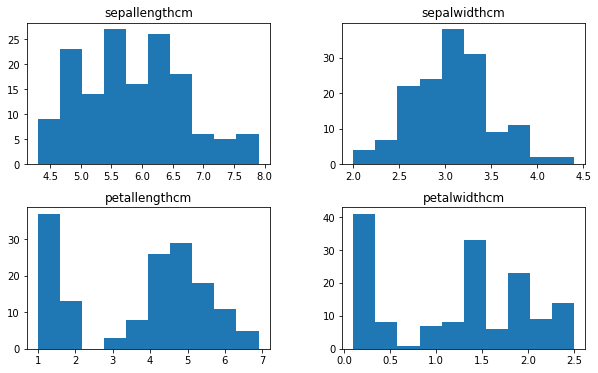

In [34]:
df.hist(figsize=(10,6), grid=False)
plt.show()

#### WITH SCATTERPLOT

1. Checking Relation between sepallengthcm and sepalwidthcm 

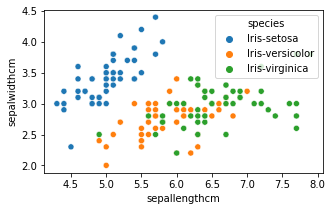

In [22]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = df.sepallengthcm, y = df.sepalwidthcm, hue = df.species )
plt.show()

2. Checking Relation between petallengthcm and petalwidthcm 

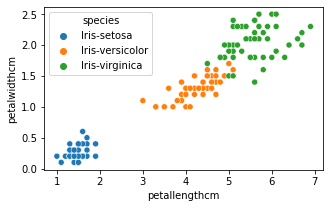

In [65]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = df.petallengthcm, y = df.petalwidthcm, hue = df.species)
plt.show()

3. Checking Relation between sepallengthcm and petallengthcm

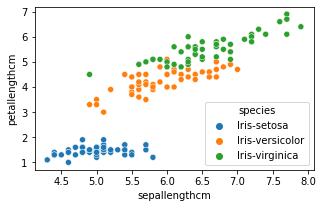

In [36]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = df.sepallengthcm, y = df.petallengthcm, hue = df.species)
plt.show()

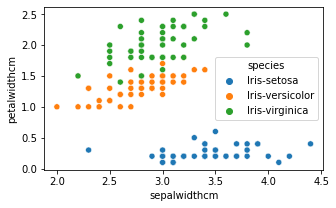

In [38]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = df.sepalwidthcm, y = df.petalwidthcm, hue = df.species)
plt.show()

#### CORELATION CHECK

#### 1. HEATMAP

In [44]:
num_cols = df.select_dtypes(include= np.number).columns
num_cols

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm'], dtype='object')

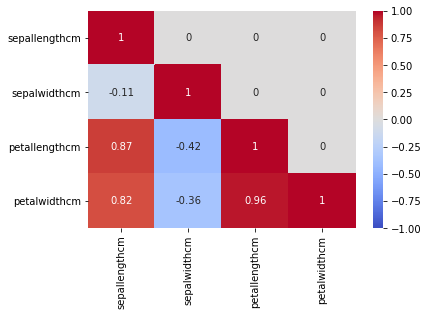

In [45]:
cor = df[num_cols].corr()
cor = np.tril(cor)
ax = sns.heatmap(data = cor, annot = True, vmin = -1, vmax = 1, cmap = "coolwarm",
                 xticklabels=num_cols, yticklabels= num_cols)

#### 2. CORRELATION MATRIX

In [47]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


We can see that the petallengthcm and petalwidthcm have a very high correlation, this can cause multocollinearity. So we can drop one of the columns from the analysis if required

#### LABEL ENCODING THE SPECIES COLUMN

In [51]:
lab_encode = LabelEncoder()
df.species = lab_encode.fit_transform(df.species)
df.species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

#### Checking label encoder

In [52]:
print(df.species.unique(), "\n")
print(df.species.nunique())

[0 1 2] 

3


#### Splitting variables X and Y

In [54]:
X = df.iloc[:, :-1]
Y = df.species.to_frame()

In [55]:
print(X.head())
Y.head()

   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


,species
0,0
1,0
2,0
3,0
4,0


#### MODEL TRAINING

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 100)

#### Training and Testing set dimensions

In [63]:
print(f"x_train has {x_train.shape[0]} rows and {x_train.shape[1]} columns")
print(f"x_test has {x_test.shape[0]} rows and {x_test.shape[1]} columns")
print(f"y_train has {y_train.shape[0]} rows and {y_train.shape[1]} columns")
print(f"y_test has {y_test.shape[0]} rows and {y_test.shape[1]} columns")


x_train has 100 rows and 4 columns
x_test has 50 rows and 4 columns
y_train has 100 rows and 1 columns
y_test has 50 rows and 1 columns


#### LOGISTIC REGRESSION MODEL

In [64]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(x_train, y_train)

logistic_y_pred = logistic_reg_model.predict(x_test)

logistic_acc_score = logistic_reg_model.score(x_test, y_test)

print("Logistic Regression Model Accuracy Score:", logistic_acc_score * 100,"%")



Logistic Regression Model Accuracy Score: 96.0 %


C:\Users\miihi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miihi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### CONFUSUION MATRIX AND CLASSIFICATION REPORT

In [77]:
Actual = y_test
Predicted = logistic_y_pred

logistic_conf_mat = confusion_matrix(Actual, Predicted)
print("CONFUSION MATRIX\nPPREDICTED\n",logistic_conf_mat)

print("\n")

logistic_report = classification_report(Actual, Predicted)
print("LOGISTIC REGRESSION REPORT\n", logistic_report)

CONFUSION MATRIX
PPREDICTED
 [[20  0  0]
 [ 0 11  1]
 [ 0  1 17]]


LOGISTIC REGRESSION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        18

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50



#### KNN - CLASSIFICATION MODEL 

In [65]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

knn_y_pred = knn_model.predict(x_test)

knn_acc_score = knn_model.score(x_test, y_test)

print("KNN Classifier Model Accuracy Score:", knn_acc_score * 100, "%")

KNN Classifier Model Accuracy Score: 98.0 %


C:\Users\miihi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### CONFUSION MATRIX AND CLASSIFICATION REPORT

In [79]:
ACTUAL = y_test
PREDICTED = knn_y_pred

confusion_mat = confusion_matrix(ACTUAL, PREDICTED)

print("CONFUSION MATRIX\nPREDICTED\n", confusion_mat)

print("\n")

knn_report = classification_report(ACTUAL, PREDICTED)

print("KNN CLASSIFIER REPORT\n", knn_report)

CONFUSION MATRIX
PREDICTED
 [[20  0  0]
 [ 0 12  0]
 [ 0  1 17]]


KNN CLASSIFIER REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

